## Diabetes Prediction

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\Users\suraj\OneDrive\Desktop\Data Science\Datasets\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

## 1.General Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Insight
- There are 768 data points, each with 9 features.
- The data types of all columns are integer, except for BMI and DiabetesPedigreeFunction which are float.
- There is no missing value.

## 2.Statistics Summary

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,122.242188,69.662760,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,3.369578,49.001676,24.827374,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,1150.000000,500.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [9]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [10]:
df.max()

Pregnancies                   17.00
Glucose                     1150.00
BloodPressure                500.00
SkinThickness                 99.00
Insulin                      846.00
BMI                           67.10
DiabetesPedigreeFunction       2.42
Age                          102.00
Outcome                        1.00
dtype: float64

In [11]:
df[df['Glucose'] == df.max()[1]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,1150,0,0,0,35.3,0.134,29,0


### Insight
- Minimum age of woman is 21 and the maximum age is 102.
- The maximum no. of pregnancies is 17.
- A blood glucose level of 1150 mg/dL is extremely high and far beyond the normal range. This is a critical medical situation. She has also been pregnant 10 times under the age of 29.
- The maximum blood pressure is 500.

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Insight
- There are more non-diabetic patients compared to diabetic patients.

In [14]:
# checking more details about Pregnancies
preg = df.groupby('Pregnancies')

In [15]:
# checking average value of each column according to no. of pregnancies
preg.mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.019417,0.184466
3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,120.800000,76.980000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,47.210526,0.578947


## 3.Distribution Analysis

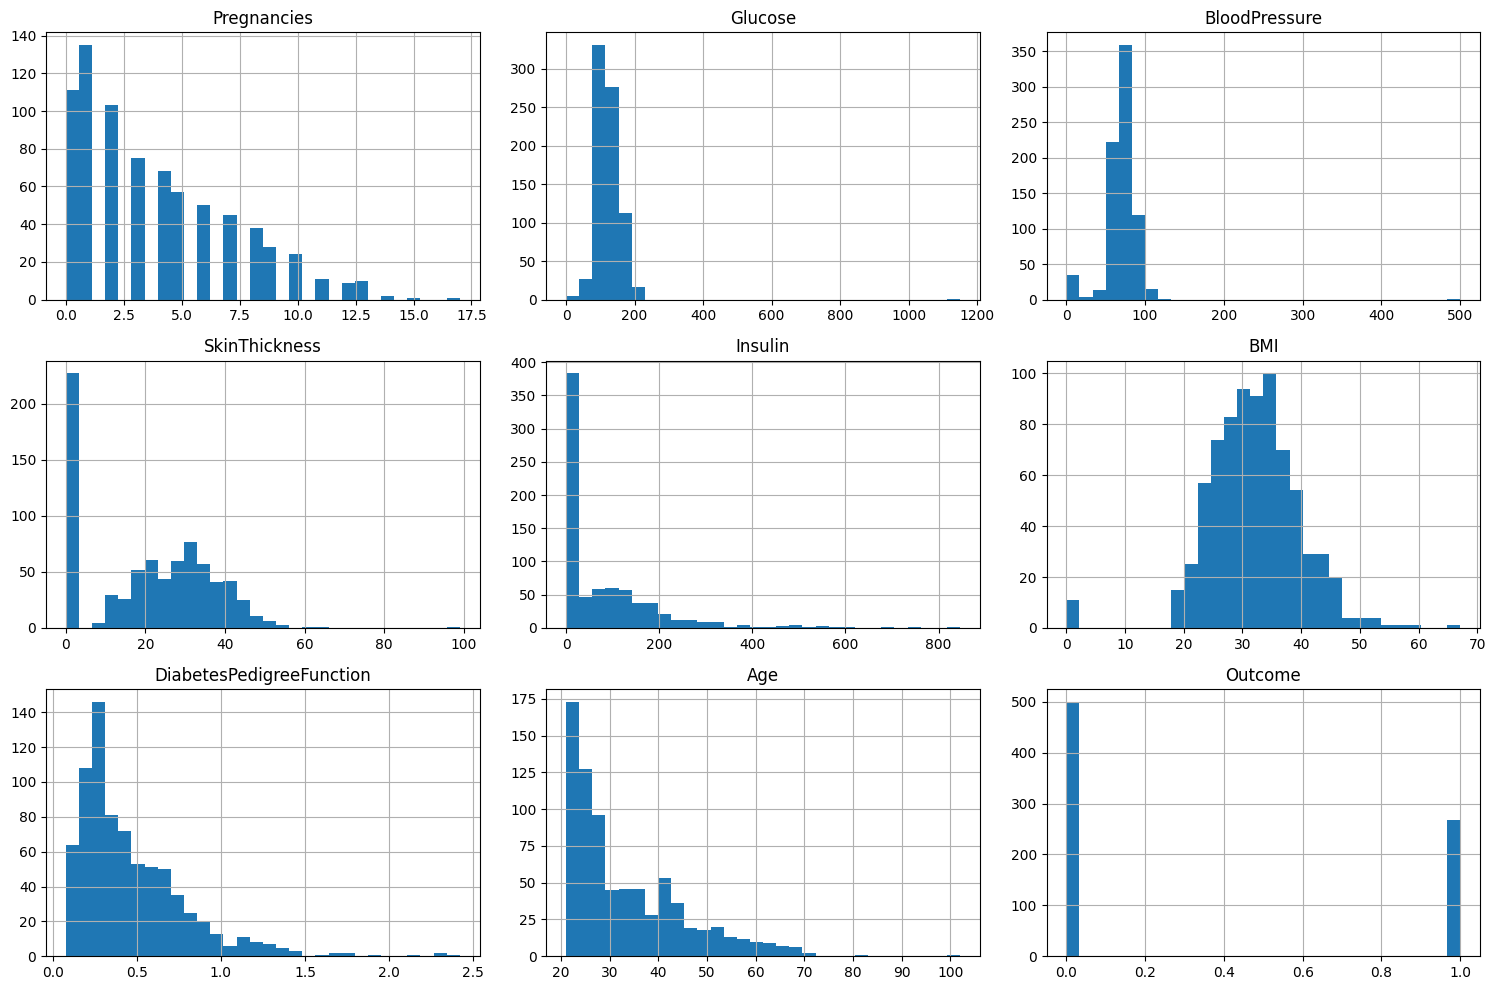

In [16]:
df.hist(bins = 30,figsize = (15,10))
plt.tight_layout()
plt.show()

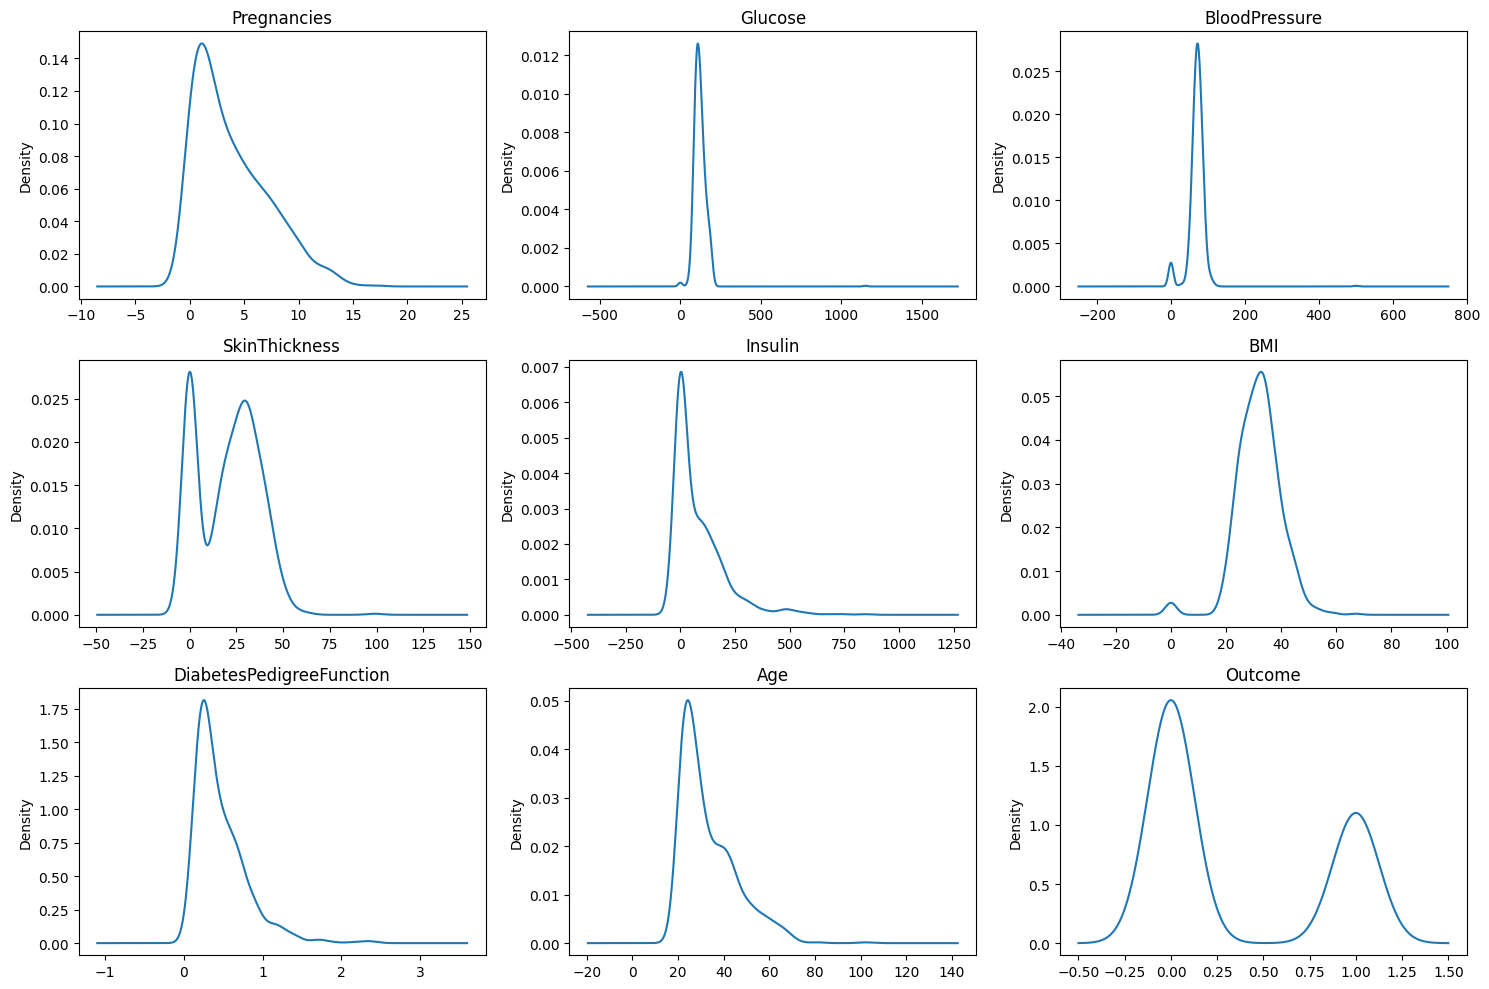

In [17]:
plt.figure(figsize = (15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    df[col].plot(kind = 'kde')
    plt.title(col)
plt.tight_layout()
plt.show()

### Insight
Some of the distribution is normal distribution and right skewed distribution.

1.Normal distribution feature
- Glucose
- BloodPressure
- BMI

2.Right skewed distribution feature
- Pregnancies
- Insulin
- DiabetesPedigreeFunction
- Age

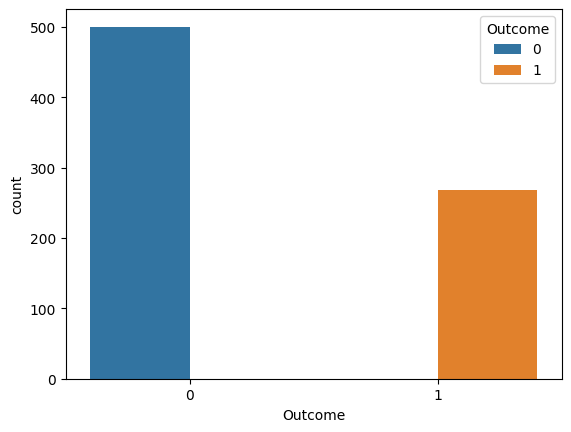

In [18]:
sns.countplot(data = df,x = 'Outcome',hue = 'Outcome')
plt.show()

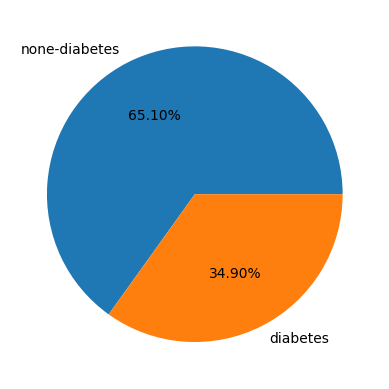

In [19]:
plt.pie(df['Outcome'].value_counts(normalize = True),
        labels = ['none-diabetes','diabetes'],
        autopct='%1.2f%%')
plt.show()

### Insight
- The data consists of 65.10% non-diabetic patients and 34.90% diabetic patients.

## 4.Correlation Matrix

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134771,0.124520,-0.081672,-0.073535,0.017683,-0.033523,0.543998,0.221898
Glucose,0.134771,1.000000,0.012784,0.001953,0.197135,0.155797,0.061528,0.165242,0.284287
BloodPressure,0.124520,0.012784,1.000000,0.182048,0.053771,0.224282,0.042694,0.212670,0.081408
SkinThickness,-0.081672,0.001953,0.182048,1.000000,0.436783,0.392573,0.183928,-0.124502,0.074752
Insulin,-0.073535,0.197135,0.053771,0.436783,1.000000,0.197859,0.185071,-0.054456,0.130548
BMI,0.017683,0.155797,0.224282,0.392573,0.197859,1.000000,0.140647,0.027507,0.292695
DiabetesPedigreeFunction,-0.033523,0.061528,0.042694,0.183928,0.185071,0.140647,1.000000,0.039343,0.173844
Age,0.543998,0.165242,0.212670,-0.124502,-0.054456,0.027507,0.039343,1.000000,0.241343
Outcome,0.221898,0.284287,0.081408,0.074752,0.130548,0.292695,0.173844,0.241343,1.000000


<Axes: >

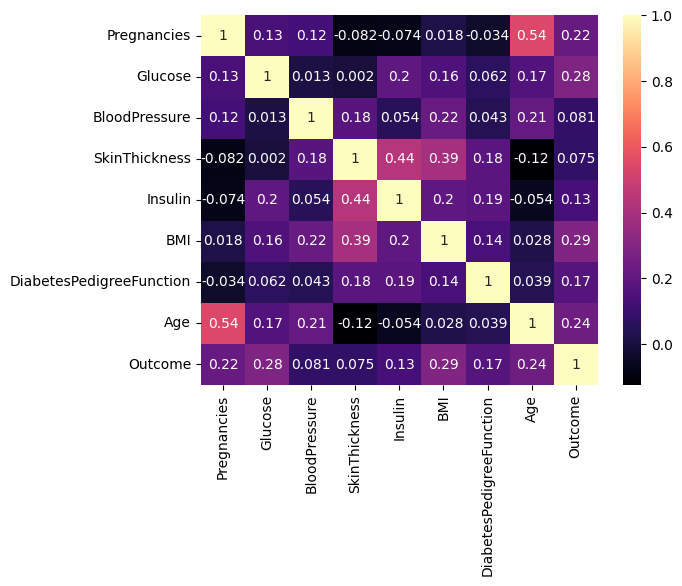

In [21]:
sns.heatmap(data = df.corr(),annot = True,cmap = 'magma')

### Insight
There is few good but not high positive correlation between 
- Pregnancies and Age
- SkinThickness and Insulin
- SkinThickness and BMI

There is weak negative correlation between 
- SkinThickness and Pregnancies
- Insulin and Pregnancies
- DiabetesPedigreeFunction and Pregnancies
- Age and SkinThickness
- Insulin and Age

## 5.Visualize the pairwise relationships between features

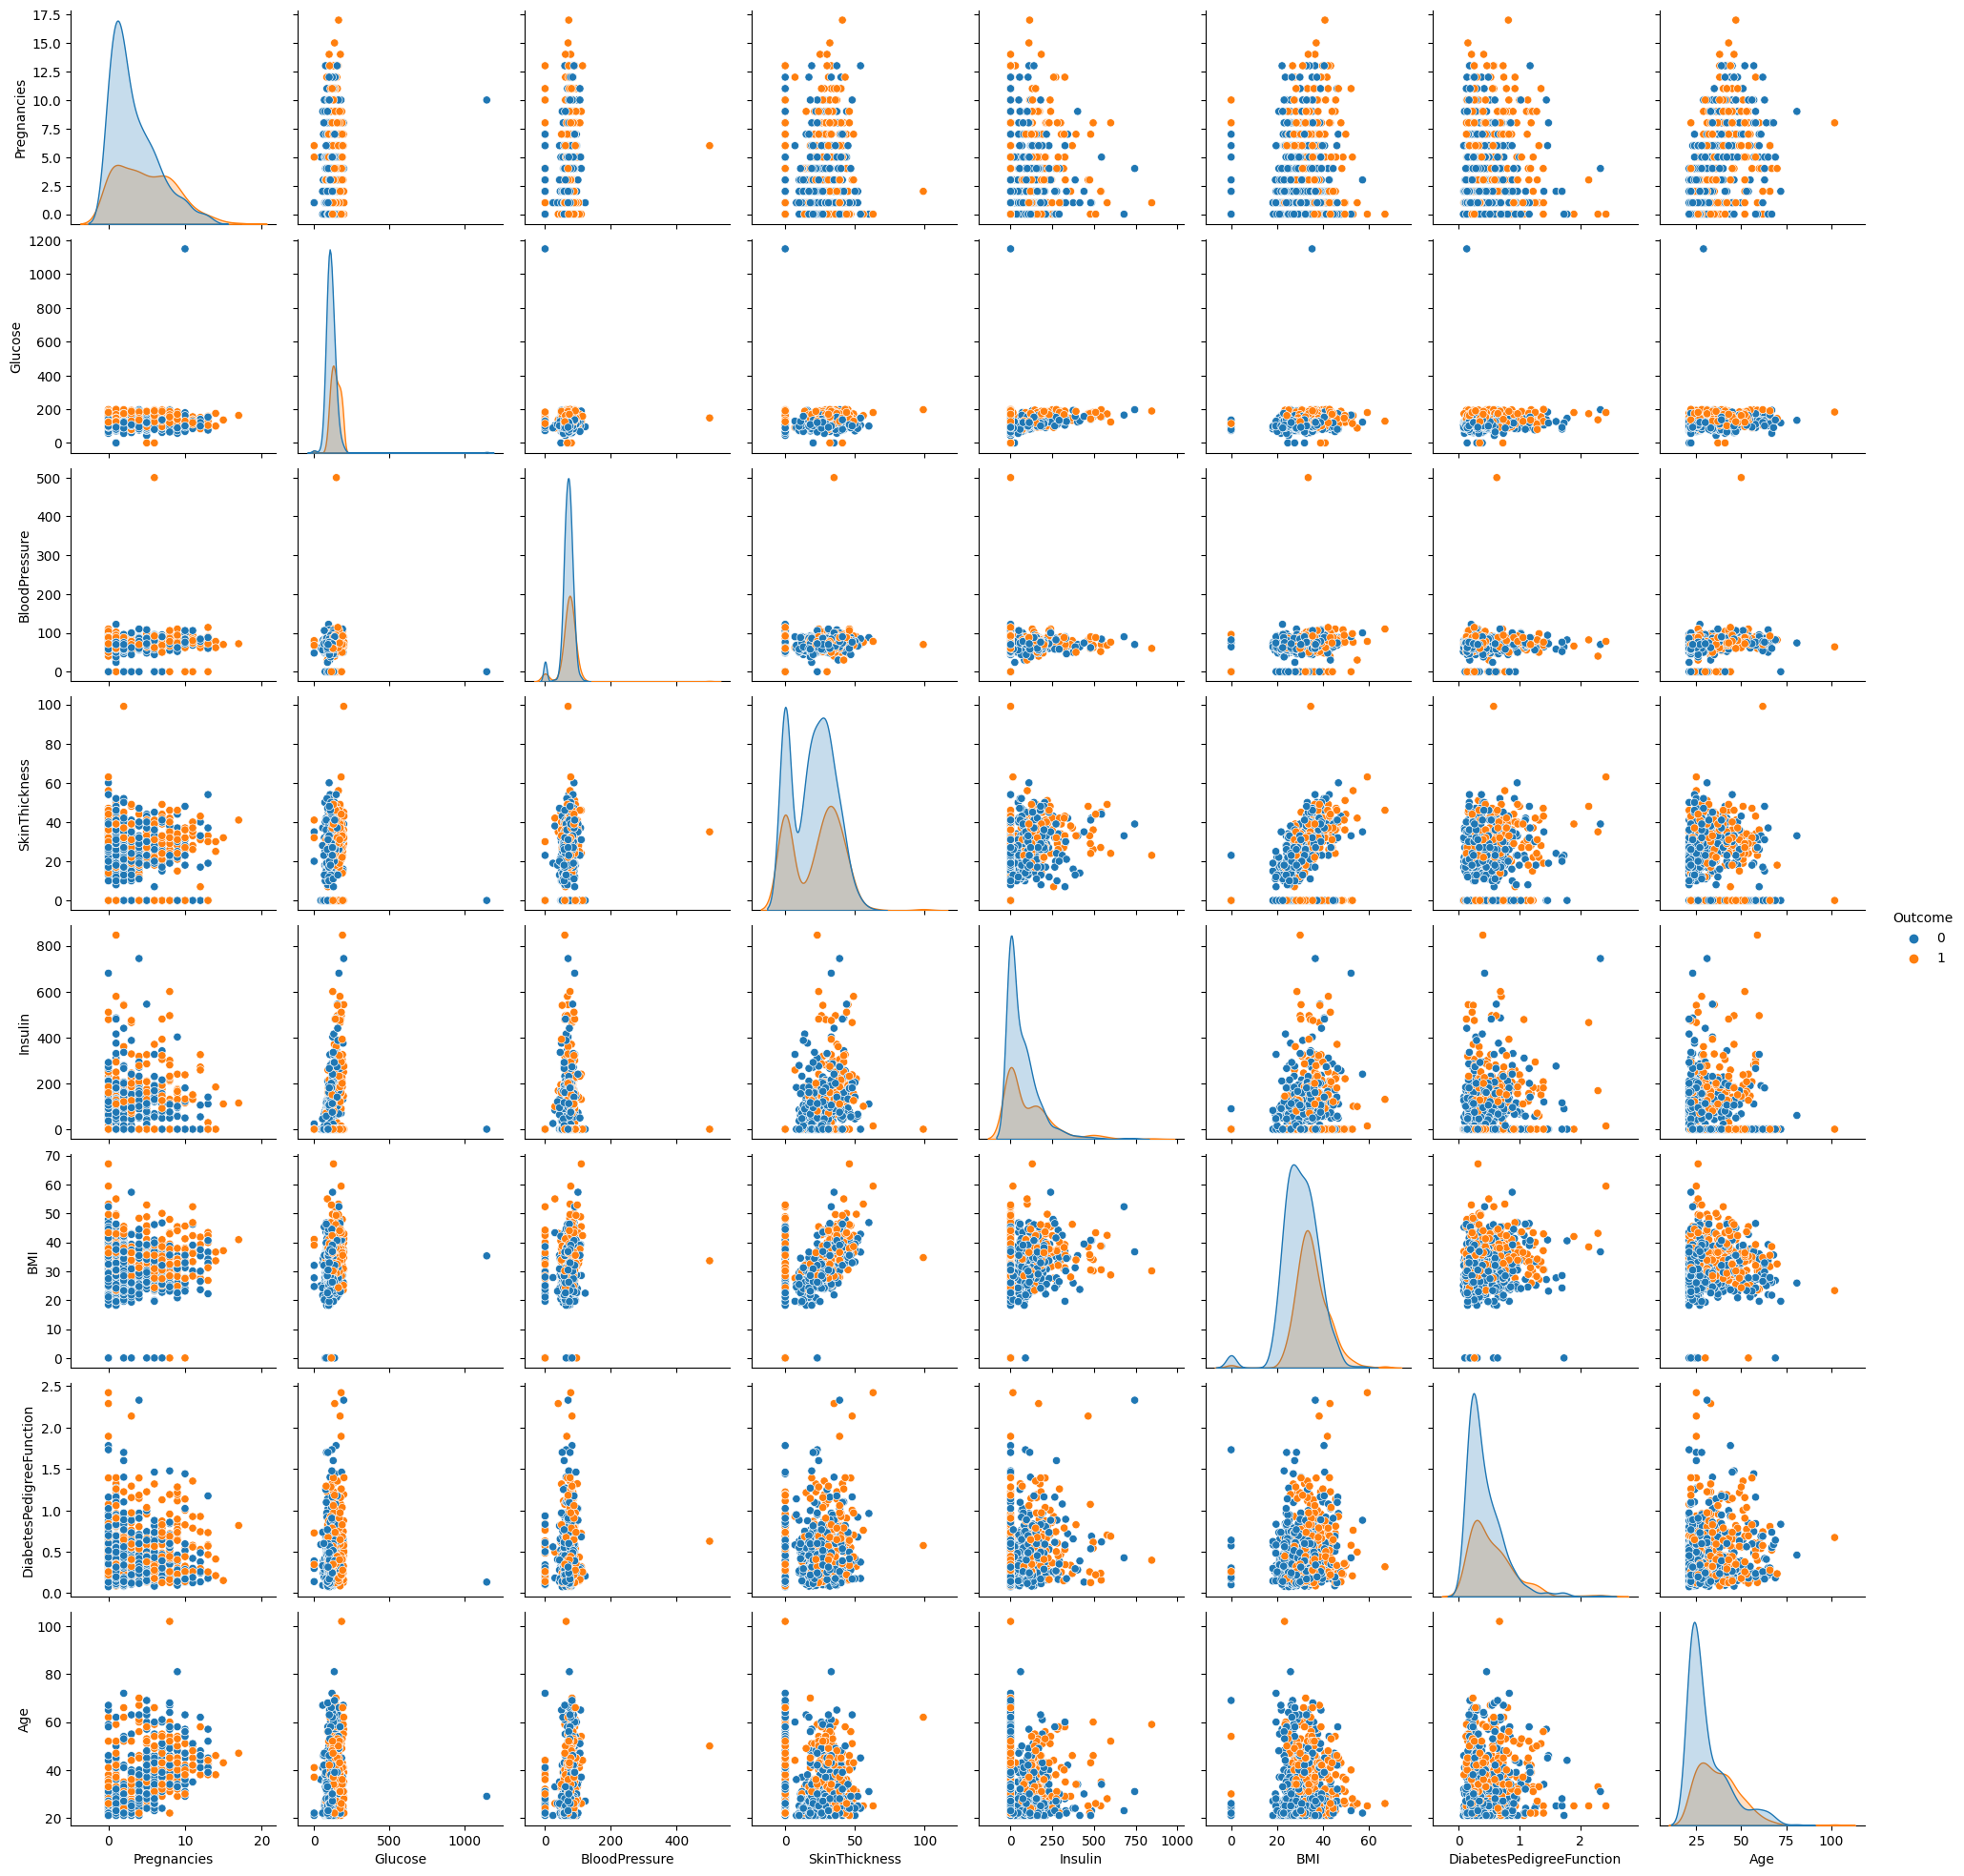

In [22]:
sns.pairplot(df,hue='Outcome',diag_kind='kde')
plt.show()

## 6.Checking outliers

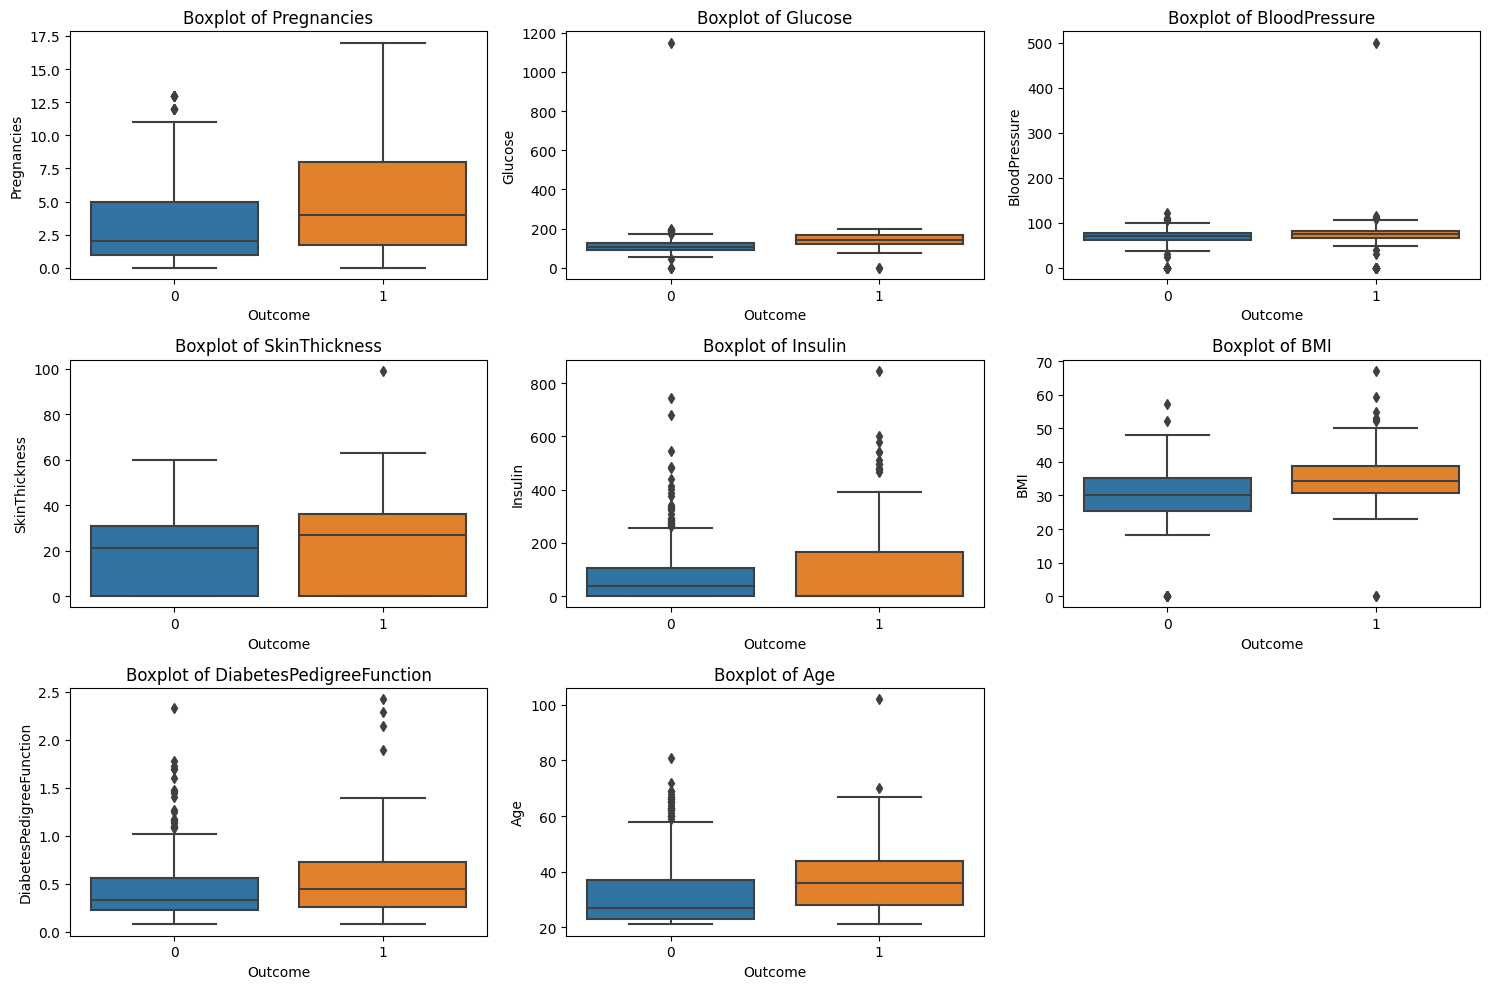

In [23]:
# checking outliers with respect to outcome feature 
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

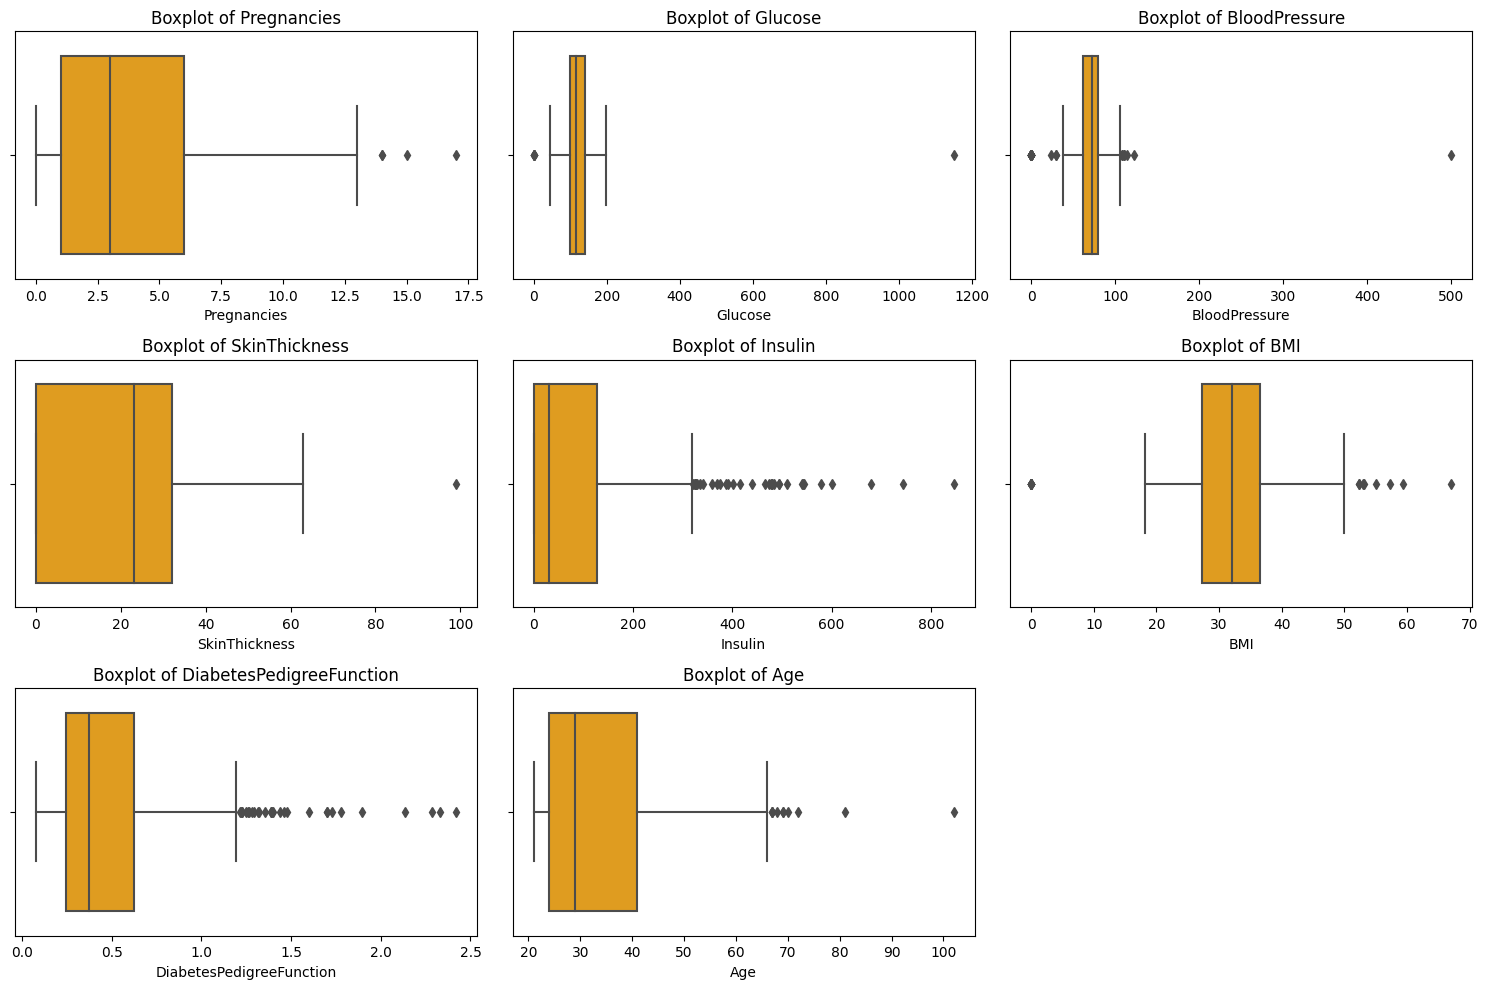

In [24]:
# checking boxplot of each column except outcome
plt.figure(figsize = (15,10))
for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.boxplot(data = df,x = col,color = "orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
    

### Insight
- I am not a domain expert but outliers in medical condition might be good for model.

## Feature Engineering

## 1.Handling missing value

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Conclusion - 
- There are no missing values, so handling missing values is not necessary.

## 2.Data Cleaning 

In [26]:
# Handling duplicate data
df = df.drop_duplicates()

In [27]:
# checking for zero(0) and replacing it 
for col in df.columns:
    print(f"{col} : {df[df[col]==0].shape[0]}")

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [28]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())

### Conclusion -
- Replaced the zero(0) with median value(if skewed distributed) or mean (if normal distributed).

## 3.Handling imbalance data

In [29]:
df['Outcome'].value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

### Conclusion -
- The ratio of imbalance data is 65.10% and 35.90%.

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,500.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,102,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


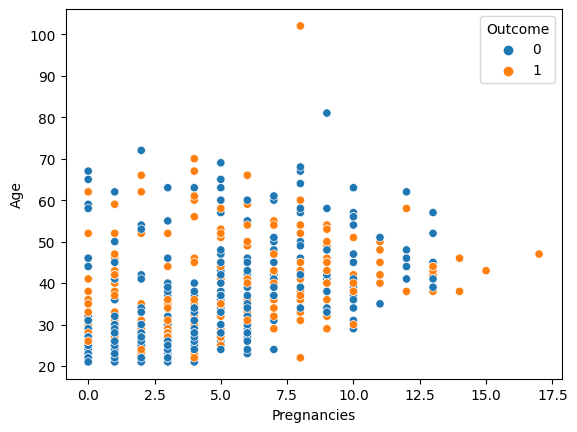

In [31]:
# checking relation between Pregnancies and Age columns with respect to Outcome 
sns.scatterplot(data = df,x = df['Pregnancies'],y = df['Age'],hue = df['Outcome'])
plt.show()

In [32]:
# performing smote to handle the imbalance data
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

smote = SMOTE()
X_resampled,y_resampled = smote.fit_resample(X,y)
df = pd.concat([pd.DataFrame(X_resampled,columns = X.columns),
                pd.DataFrame(y_resampled,columns = ['Outcome'])],axis = 1)

In [33]:
pd.DataFrame(y_resampled).value_counts()

Outcome
0          500
1          500
Name: count, dtype: int64

## Divide the dataset

In [34]:
# divide the dataset into independent and dependent dataset
X = df.drop(columns='Outcome')
y = df['Outcome']
X.shape,y.shape

((1000, 8), (1000,))

In [35]:
# divide the dataeset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 20)

In [36]:
X_train.shape,X_test.shape

((800, 8), (200, 8))

In [37]:
y_train.shape,y_test.shape

((800,), (200,))

## Feature Scaling 

In [38]:
# performing feature scaling on X_train and X_test
scaler = StandardScaler()

In [39]:
# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[-0.28620419, -0.97705831,  0.234041  , ...,  0.60728242,
        -0.78871572,  0.49587088],
       [ 1.77918686,  0.09939972, -0.56168618, ...,  1.18379878,
        -0.08941477,  0.32641479],
       [ 0.30390754, -0.65085891,  0.44156281, ...,  0.94214415,
        -0.63190937,  0.32641479],
       ...,
       [-0.58126005, -0.58561903, -0.59604623, ..., -1.23445712,
        -1.14806361, -1.11396196],
       [ 0.00885168, -0.38989939, -0.49228533, ..., -0.67128057,
        -1.15459721, -0.85977782],
       [ 1.484131  ,  1.27371757,  0.75284552, ..., -0.44296575,
        -0.57964059,  1.25842327]])

In [41]:
X_test_scaled

array([[-0.28620419,  2.20020962, -0.18100262, ...,  0.11941066,
        -0.72169951, -0.69032174],
       [-0.58126005, -1.17277796, -0.69980714, ..., -1.49321392,
        -0.94225528, -0.77504978],
       [-0.58126005, -0.4810573 , -0.37786536, ...,  0.21556799,
         0.9387399 , -0.52086565],
       ...,
       [-0.87631592, -1.23801784,  0.234041  , ..., -0.19942994,
        -0.37383225, -0.43613761],
       [ 0.00885168,  0.91489823, -0.07724171, ..., -0.30597686,
        -0.46203582,  0.24168674],
       [-0.58126005,  0.65227989, -0.75113408, ..., -0.24163408,
        -0.24021531, -0.85977782]])

## Model Creation

In [42]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.77
Confusion Matrix:
 [[81 22]
 [24 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       103
           1       0.77      0.75      0.76        97

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



## Hyperparameter tunning

In [43]:
# using gridsearchcv
parameter = {'penalty':('l1', 'l2', 'elasticnet', None),
            'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
            'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gscv = GridSearchCV(estimator = log_reg,param_grid = parameter,cv = 5)
gscv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [44]:
gscv.best_params_

{'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}

In [45]:
attributes = list(gscv.best_params_.values())

In [46]:
type(attributes)

list

In [47]:
log_reg = LogisticRegression(C = attributes[0], penalty = attributes[1], solver = attributes[2])
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.77
Confusion Matrix:
 [[81 22]
 [24 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       103
           1       0.77      0.75      0.76        97

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

